# Ford GoBike System Data
## by Fawaz AlTuwaijri

## Investigation Overview

In this investigation, I wanted to find what are the attributes that affects the duration of a trip. The main focus was on the stations, access method, and user type attributes.

## Dataset Overview

The dataset has informations about Bay Wheels's trips. Which is a biking rental information. It has around 177,000 records, including:
* duration_sec
* start_station_id
* start_station_name
* end_station_id
* end_station_name
* user_type (“Subscriber” = Member or “Customer” = Casual)
* rental_access_method
and Other attributes.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('202003-baywheels-tripdata.csv')

## Distribution of Trips durations

Trips durations in the dataset take on a very larg range of values, from about 60s to 84,000s at the highest. Plotted on a logarithmic scale, the distribution of durations takes on a unimodal shap.

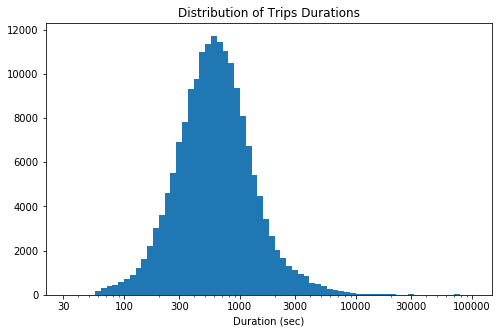

In [3]:
bins = 10 ** np.arange(1.5, 5+0.05, 0.05)
plt.figure(figsize=[8, 5])
plt.hist(data=df, x='duration_sec', bins=bins)
plt.xlabel('Duration (sec)');

plt.xscale('log')
ticks = [30, 100, 300, 1000, 3000, 10000, 30000, 100000]
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels);

plt.title('Distribution of Trips Durations');

## Duration vs User Type

Plotting the User type by the duration will show us that the customers tend to have slightly more duration average than subscribers.

In [4]:
top10_start_stations = ['30', '58', '16', '81', '3', '22', '21', '5', '15', '114']
df_2 = df[df['start_station_id'].isin(top10_start_stations)]

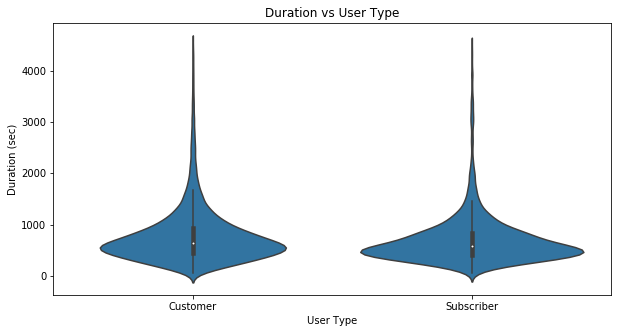

In [5]:
plt.figure(figsize=[10,5])
color = sb.color_palette()[0]

sb.violinplot(data=df_2.query('duration_sec < 4500'), x='user_type', y='duration_sec', color=color)
plt.title('Duration vs User Type')
plt.xlabel('User Type')
plt.ylabel('Duration (sec)');

## Duration vs User Type vs start station

Here we'll see which stations tend to have longer durations and for which type of users.

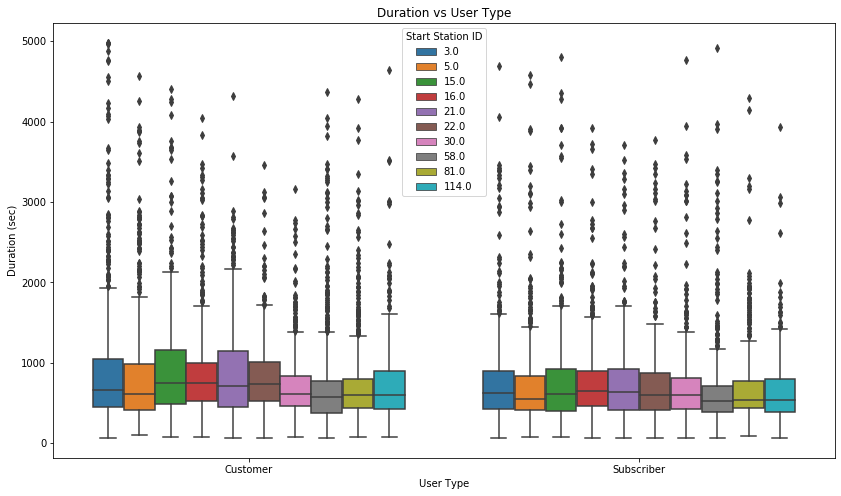

In [6]:
plt.figure(figsize=[14,8])

g = sb.boxplot(data=df_2.query('duration_sec < 5000'), x='user_type', y='duration_sec', hue='start_station_id')
plt.title('Duration vs User Type')
plt.xlabel('User Type')
plt.ylabel('Duration (sec)')
plt.legend(title='Start Station ID');